### Refine your objective
##### This is a script file which will target SCFHS Task-2.-
""" 
DataSet and files: 
- Medina Municipality - 1-.html 

Problem to address: comparing month of Shaban against other months throughout the year for dataset of medina 
between years 1340 - 1440 H. 

the objective here is to run Hypothesis test for proportion and check if this claim is true or not.
 Alternative Hypothesis(H1):
 - test the claim that Muslim people tend to die more (often) in the month of Shaban.
 
 Null Hypothesis(H0):
 - the opposite of H1
 
Developer&Auditer: zos
Date: Jun/13/2019"""

#### Assumption before we start
=> more often: since it's not determined by specific percentage then, I will assume that:

    H0 : the proportion of muslims tend to die in shaban (more often). (what people say)

    the way I understand the (more often) terminology and I will give it a percentage number:
    (always) => around 95%
    (more often) => around 85%
    (often) => around 75%
    (most of the time) => around 65%
    (half/half chance) => around 50%
    (some times) => below 50%
    
    I will pick e.g. H0: Propor above or equal 85% - (p >= 0.85)
    H1 : Propor below 85% - (p < 0.85) (what DS should study)
    
    
=> since Alpha was not also mentioned in the question I would assume that significance level is 0.01.

=> in the data-set I'm missing "religion" attribute, since they die in medina my assumption is that they are all muslims.

=> Randomization check is met.

=> less than 10% check is met in our sample.

=> success/ failure check is met 

### Collect the data (save the data in the directory data/)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import requests
import time
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
from dateutil.parser import parse
from bs4 import BeautifulSoup
import html5lib

##### all results have been downloaded a html from since below code didn't work in submitting a form param to retrieve lists

""" uri = "https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx"
headers = {
    'Host': 'services.amana-md.gov.sa',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Cookie': 'ASP.NET_SessionId=e3hwtx55vwq5jf55jihmhcyy',
    'Upgrade-Insecure-Requests': 1
}
values = {
    '__EVENTTARGET':'',
    '__EVENTARGUMENT':'',
    '__VIEWSTATE':'Drq9R33Vp1MDnk0LYdIJ6VHIixDgzhuQLntDxnuXO0DtRgOa9PogGJ7O5tR+Wwb5b+ntjGM/LDw9EbET7Yb1M2p1IZE9LqGL6C61+wYN3Tye0y30qxNas09HvQzZ1qQTvyybx5MKxLB5Oar4kZZ+vh4fgyxxi3LOb6M6aB6vB+yjJ1/Gam+IsjQIQgLQVvuJhv6tG2XaVgc+JlFqt/otyukVVeiXZAnKV3x0UTDEcTxSdVebMYhs3Oumk0nv+2/+dxulMIfZ8r0nLspYlWOY7av5IqplY4A9krES9kCwicBgQXWBKY8PoaTbiNBJsR9CYvkSbb5ukpSNs5Ej1N+vW/9O60LHeIs11W8Rq+hb4Zsf77ASboP+bOxFFNWnCHDbXQizgRz7ruOGKHlDloXiFFtuDTHhwSsXkDmsfFNpYrCRVGoMdSPfYizS5B2KF95eJZQrqkEWa+GqAfHX+/lb4q22z+1vl7hKc0Ai8PXoDurIsFSaBPtPR2SjLJz93gMMQkzTtJ0CtebiTvu68QO2XhDI1gIxOPwJ/xO0rROSQYV10nJfyZSeXe3sW1gviuew7pVl4pbMm4fc9XS8W54Y7nnJ0phM+3tQHF7XEQypPh0Bt3/Xyumi5OgdeuLn0OUI9IHEwHdpkP+Go0kVX+BUldRrSRVbISI1DBHkPGAC0YCK23mSjB4b/3LvKKv+lSHgwIcagVH60nBqqgdFFxeOox5vlICmIoa1tKoI3eWb7tMdC0JUws03MCvDda8FAyq7sVSWcxY3kpiIs/VXIOk+hoxB+jMRRIih23OQ2qHVuElshXSuha9PTG3pmZaYAGEkpBUie8kcIAAOBtOHm1SXJnwSXXIIePLPQ9d4jC6J5eFkRwFySP5zmEJolgyLIT6G0JP39CuTqKtl7QP5rCnUsUkXWMgOgTjkO6T1wICVZP31LFajbUNpuaFUgwinRiIAfv+xl3GaGTnxsbacaynSbVpLJgcErEX+nL0EfNl+dW0irrv8wZt6UEANqAnr6Nx6bA6GcsaGaSDHl2LEzrrSJw+nJBIeqY/qVgDaM4z2b+rwiQ9Qtr07utewSZ7twlhGnnYbVox2vpcIavm7QbA0zHV/Tp/VCAzlA4jeagtpr6AO59n33U1wtSe8/tbNLTELvul9BgZwoC8cXAnyA9+Kk8ruCs41lGmBZ+enHM+CfdwMSsnv8C5zY+ZBI5OasRrYze0DsomajCgq1ZeacX7XMcxBiCxBz5Dd4T19bw3fZyqiuLwJcfkcsRMPh8Cj6BZYkqYQJ43JM58sEMAxTYUrjrGcae8/ojbHr4b77QBvU/CRslHcdF9bl1Q9xivv74KekE7hCdbOHYl6guofVGT1JNcUdQbU0865sSBGBEFpfcRHo1PFSRaOWrxz4nHzAA01B+/KjXD4fcwQOVEkGfGshrYzFTtOCKit+aMtYDMHDVea5Wj+NKmaiiryJ+4VsMN3oPT/hKW1O6LRXje6CtHnjjWE89yvIUF1+jd0QRtANH68HdL7cKw3ZAIJ7Shu6klIHylz47nOCRQLK5ZEMe8TXRm+ZZ5zeUsrSf7stuNLkkpux6cateB3Ilis2zYDzeXBou362bqcogM1VinJ1v826qAVlfevgRWkWVY0sFp/JYwA2KzpLJgwNYK2UBYJ2jH8hwQ2+l771QWkIvqE0celKpolUFdxNnI9RjdeJD6+A3hkJFN06HaR9zK+2L3W+/muFLZSdgLZuKowacGHw92mWMVdAnA4E9A5xO8hQxDig8i7NlxePAj7TTNYybUCeO9FIQqCGjSaWT0iDEmnwrnnClqgtWA++QOk3D85sJQLDqs0lmHlP37O11OEez4vJZPMchhxfGaK3fUTqMCwQ7HGXZ4RT6+M68ofr6RUlDWaSK3WC7kJrYHhOIEMcobNxdoWBmhi0JCaUZNbPuf0gQzWmsvB3wV9uhqCtQ5Rp0b893R8IccGKUpL2T1t1fvX9anZFUv8Yj0oguPYv+yUDuqGJVFVheXypsVRT/LQ9cCbf8n5w1HWeDhcD+FBBRY0PYHr5lm9UVdjuTTdzmpz0iSUTZf2695569i7wU2z95Qjhqn6Flvj0XyZeVmnBMRbu8FcuUThwPO1Dx0UgqKwTYDLDHj1W77qvMqibMIqOOietCmiu5Le99w4cuCzKnkaOeySVGXUVmqL86Tq4qVQL+cUXDxsLmeFkv28IIw21hfxSu/5Go7nbr4yQNI2PQDIGLvwOkRth3NbGo9zGPUCojaEyReuaRPwyFp8bCrREHpi18TxGU6edYtihsdiEoiKh1htGcQ8MUCtE2/VsrfywPouCIcclxZwJcG8dn6IzlIRMYiyGUBI2FSuJ8g8j4683QXfakN3nF1YAPmRNcwwn0jOwpQOBTSF/bI8nazanc02ZwWX5VGC8r2+9zXzsFUHSToYfogY1EAj0BkSyAvKrKx+El6T7NW8+IPd6XcNgl5Z2g9wSXVYYNr+2rPdlRnq+w/jgDKLXixBVoSZnIcUo+AN2h770MlKm2Sri5RWvy04OQDPSLa7cgv9zGoLvZt8VxghIMQRBs3BVEy/bxR1n1q6KTsfj869OgGkQBbbXupwle6tIMCqy0SYisd9wkaQKkX2Q6grXQnxtpbVC7qEgfQNG0fpzddXY3hY9bknotIjIRy/Y0vYF53CPp66jRgENaAHraeUob/KMMzXveKt3BQkzJXT3H0EKAd91iB32Rh9CaoYF44M6ZaBTZZPM/baNGaG2KM7o1e2PcMGgakeufNwVaDysTwPJE37QRQGw6hF1GyEEa9q2+vxG+XmMvJ1xJrsDhYlvIyVTUDlcF13xOiQOHT/9JE7AVZhO+eWEpJK6hshfBF0IWL3LPU+sgjDJi7y+nJz8V3sJ7Tuj5JkhvgoTLBrft66QgjLudulEEgonueAZw/1nS89R7adxLs7X8P6S6hKJqbVgrcp3cxUy2u3qNt1ceXtDB/7lplGF1NggKVorVudovSFwCjLj/VWruU8vWltX7CzghY0fk5RtLrVA6nv0YjtAG8Uq7A04H5RJll5VGghFsbuVH/bUJQFFiUuxGOIACsIVIdzLQTZAcvBGsq99sQRHHEASnGckESFYQvcgjH4+dODx4Gh64X8QCkzUUQzZhCbtlQ4N1mzIoC6Dawy6Ro3yIQcyBcjTEtwHdVB/wRIV9facrQ8V8NlFVDNlEuN1fCJeDZ5oXNXp2iWX+Pm6Dv5e+Lo3UmGNHG93uXlyVDgGvKJ6jStP4fuf1Yh+auaiWJXAr38F83UPt1hHf5ZzuNPSJdYcgmVG8aUCfBRcSyLz72BzDYZJsLDHzfo2bjn64Molu2TzV+sb7mnEYbEYB7T9T4ZAaxF0JRizmCFM1DM19hsgGXTJ7AQYvZZ1zKHqXJtPwURCG01pst8ivHwMo2hhWPQkiI8SdMsgTNyAEF75vMjug2yjDPaeRg8PV/XGW94LfOvJbynQSGDm/MCtpchKpGxRBxXOlpFvjjOxq+bxF+n1N8ZWHMpIMiDjDScZSpp4lSTp83IcyCiQKUFGibMdVEJ/oBzGAH9kf7Muv1xG9RWX8l2p21/1tB6gn9VJ2pxdg8/FR9KB6DqjAwKl3MGxpchPNhQ5WnKFiLkKwWpLfIxWyysOvdXEfYogLqFjEMMf0RuZ6xN9AonV+jeKmFHavR2LzUfFeXTXSv8a7RvVjz4/wB1PNUh8CcoAW+Olht21rlt7d/BSnwZhYd1z7epwata8qDDXo8l6qYQlaeXgCrdsAh6QdDu6WcqqHD1Ys4gqJHTu1mdNenAbxaonJpx/V1xOgtx8o2c3Q/GvaNAsEJxnCrCBqBA9kK0AIAFIWmG6RBDrBTVYI6o770Xqzb+KwkvbHuw6lVOg8QAzoCqwdy+RsCug/hWuLaTO+LkO+2rtvUcvOwOs8uGHufHejXQ3XQVuGMhwcTIUVDAyaoeXsPHOJcHl1v44OtvMR3vnvwy4nkbNteilyx+t0qfMpTBmAOOrn3BY4117kZUcPQ9FTmQEk+fk9cgmksCBnPyNuQyXIk4qkZFMWc+OVQ7jsx+2KFPRx5TWpSE0gx8kiKLDw7nQUi/IEoBGA3OOewMSNCNXHx/D/HD1VcUOGDIXt7LoRJLwph+Tn0f/j9uXBrefCiKLIQW5yq3tJf+BGr9CkKADTxoVWsnIUEsestbbbgFjZ7oBCfF5Yk/ZT6vZGbp39YoaJj9ziq8R0lW5u/LrVLvRc/JhZvm0EiW6QKPD9Nz9CfnMTQEY1OkADR1k4kFeXwZsgSow3R8bBm2si4b9t0WA4pi145ax5GrQMA4OKJfG8Ju0aGLw/xgj6VWYQxiPG3NHnJDnr23Wz3ckOL5tELhRXxkzsf4LGqRlch0RzMTi0xKvNhKVozGNm6n1JNtQb3iSqW0hwoSfK6lp843Mmnva3XjUCprGlxexexD3BTRqt+QARLb1mt6RqtekND7TC+tZncjBTK08WiuJDRdUeaXOUd8QwzY8cnMChqOKWgjQASRbrVuSLUE6c3XfEwqNUHFsFtD4IJUQ6W2QpMo1hKBKPJjCNDTcyd4YsfgJKEBk7Es6MpL9ElU4NzroMH7+ovGPngzIQIgRcoRMWI7sZlICVGwCoDzpor5iKkehkPC2+wR+80PiBi54xVkVDPk+dryypf2257hxJlQy7aAREoWPVS7Ka6QlSQ5k2aqXlekHtWBLG7bmSYkyGA1ugQl4Xy9z7v6CDVwzoionM1bc6pg5DzwzaHFhrd3y9je4FFZTxTD5csqHHTKWDwlQtyjrRxahbniaPOkmVT9Zk+6LUoUKdqAxj/FalzhKZjYwjR7Tb586XyatPZXRGFMceq6F5YJo7P2mEu46ttFlmqmNWJI2b35LwoSL6V1GDJRX7JZbjgQM3JAn400kX40DIS/QM6P2KHrwXs13g1LtO49mzLj7TOMhzHz1PG/SeSM1IKp7Jph0IYBLfp4X6O7svG3sWL4DRbjstkoHSa3r7zOYEpa/QXRsYjjVi1rE69ON8SvPNW05NuxhiB/BPM6leCA+Iu2Jv3egQui0Yn5ryDY/e8QzwoRCZUZCnvNPD+DUKL/mp0xmIkn+hGpq8q5zksP3vwldW73XygxCo4IFvn7VqL9PSTHpWThS/5pTThRoijBmvkDZT8QpPWUvvRZR+DHSA4B38px87kBctqGwuTL9Z+2E4cluWCRm/j0RDOl/05m7wp9AYJJY2HM5uxJkOMauQvuqoH4dbWgyK3nJFb44/4UelhArFNVmxXW+Lhkg44khHn7yCKoU0JJ4NrkRkxeIQ8RmD0OlQj1alqNBO8CM/X/SayNci9xJFv/sKmQmjeS+ZUvJdp7yDR67n9yOu03NLqbOk2MgSwGncTmLE8RVTQgX5XUadg2GnVdfQzlNBXfpaXP85VRjGweFqKiDKt2Tq5j5OSfggoALOoHfnoUSMT9wNyKrtcgQjI4a9hGG/sZ/XphZ3eYLnEsm2akBOJJCL9xWxTIuvuqyEyEYAeSZ+KnI/eVtc0jWJPVKiq0ECdCSvEz8QghBddQ4Z86ARkYdTJ7Puis5alIh4y4vJyNl0NZCY8YWlgpBEOG0uF8iauYfAUBOMcBSadZlCU3pfw3ouKq1jbZTcMARbyy+LoyjxFTaOUzOkhHXiXuFr8qaeHIC8AuFvSOnSPF3EnasxnapzhjldvhJz5wq3iY50rIPWaA5jxqn/jPuGd/tCRZHwBY6xkY2LIn+tZHDFIzCiayAudJSNIf/vjq3HhtVjU3YjUcvHLwxu3bTbpQxtv4dA+ZBdIuVVwrKgNZORthBMMHup0XfQIJtbbxPCup+AsQH7YYSpfStW/Hf8XmP/DunGRYRqFmbDeFnfqJ5imjpZSOp9KyjkMN6+g4aLlrh8DG3kfQqjpYIPyGosGjqoAHFGRNB/W9JKuBzSdPW/pxort2FfX2i/hndoxg5gMAPa1H19AAJTeykPfOmIdPzmMWkHS4i0yp8UuplaGaOrxIkditroVZUR08bjByuqjkghi3HyaCN0r97evOPqM2OvVc6omjlYjhR1AdUBEUFbob1XKFKneYJ1XmSMNILN7sBMLJsd04q0gVaW2Muf6Z8vUy53IRyU64qdEieuel4hun8Y8tljXSb2WxxDTMvjjxJtVBthIVXaHirmNUHsC6QATx9EzUW9HAHRAzjG7v7hrCWyiYfES48RRNqLPbfCXEtaKOHCKX8UL6Nttktz/iT3SdSZPyi2UuEVm/chqcQESCDxWnqzW3l0mAYkO4GO0ogZVOr1xIKFrk4dF63UitG/04SbSYu+cdJxDxemj7w0o/Syc91HHkM8NvOQ4Tqup71E/cdyMOiwzWYJ1xBiHi/ozFxIFBc5+nujSev6VdK1h2dxHgYU70+pqy7+JsgLnn8TjH8yFbRDj4jA8HrKd1iZZgWpI71iE6DwBg4OpHQe77NCaDPWB/HyhIQwuyG2j4F4uE1fcRL1sn1dR3X83PmB4DgoVJL4sIlaJVbiyaBgKxprqLDEnbil9Jk3lSzuMTy+DYU3limViUZLtbbcgQDW7+/tdrUOA3hNnz/PVvNHwP69s4OQaPKLnyH9WRPROJsjJ6If2aO4ITpc6bF87oSVis49ew/bESOmCMih/747WbQdmsZ/GnvqO21cAPTW3xaywG+N2Lo19UAcU4v3/BMbgXooU0dByoIfLOX0e5xTdXDwgzLlMNHa2vaHoLaH3lBaFUyAQKWoDARHYBDIBXLK2bT7/wE0Wqii7E+eGwWtV+pMLDQoCMtTQHj8uLT5uLXDYlu2L3Q3PawcoHupS6IRdU/2LY2Yj8Vu5LFNsREi8GeI6WHbZwh1AgZ36wjkQ/mgY+sxu2DTkCLzeuC78kX/azOEnbBKyItyhM5yO6xwdVSn60bqL6Vr+tQ+zuAhuLSyjTrs98nibtOH5dgD/S01GqjrtxCtGvfdmP+V7Eq9u2ilriovRRu2oMbH/zG/WQt9DtjuWm7gJkcQHgLUOrSL6ER9qjN5k/ztE3ja6TeEsVy19myOsSyXNs/qHF2J6uHYOuemEibl++VEoEt1sW9qf0RujfHP024j0KxTFOCXcD9buU3sc8ReFgb+Fnkel/tIf6Cy4IjFD9F0WMldq+J33sCyV9yUwe42tgcizrS99Kk/taW+cBH3Os69aWY8hPvF6Tb1pvFgLhY3j/LLXlcsGoUUOUJjWP+Jl407DPRbuCtcjE1C49skVGbQKKTtvDbMXIE7UyDSidzWO+6/LsghelvPozK+w5S1mWft2lXUJYTAVkNI1NUPjYXE7UffOO55+Bbz/I34kyDUtI62MIET0L7IreMGSLRvBMA5LHj9WvzOaZOxxqZ1Ohq/m3b1C4iltMGxNTkLaI1vn2Za0vgvag+52xu1hNJCWpetwoNaYWZUahYYrpZCml5WSlBRfl+dl4EzlKbSC64GUNUz2DpahdeDLO1daLrWRxXnBN3WmY3C98xpbmtVPEP0xBm+7TEUOSraJexDUSxqm0pkHIcXOX0o5QrMoZwkjt6jo71TOzEs5GDmvW8fsYG5TaF829VnElxQ5TYB8oeZx7JYUcgXlCmsxTFLCNwULsUtGTD3u9f3J2rL/IpaISwdy7qXwIcRUJ72gf+PM52z5Li3RrCWkWdLsXmALj+kKUuvERwxvDOFZIyKYFTLZNIz2PEzV/xPht4F2sJJaJRbsQBkmtJ5julojg6xGNRGgD5Sos8Kn8/23SB4cPqIpL8LG0G8278x/0JheIRUWsq21dvXRIDL2aAayT/E9UNkqbM+QdoXwx2xuKFrZMYTAJjhIexblKctE/nw2I93Mi73OGz2RlCtXYSzORJFJb09TEjD8WD3q4SKQUmC/D6FZ68cjhn42py21fV1lI0u6fwFXt/x6PGOWVP+sSrxSJDNlYemEJC0pd3nbCcd/sZC/uCPLeoupqJK8Jvj79+Loc8S2sSZJw4QgfSNcNaHw3UPvWM6rRzPiI5tZzwSZYGQC7oDPe+u3yWzZoxTIM/ReI1hGzI+KUxojECDn0VwAfNX4Igz74ayr29L3Kvp7vi2MbcDqLXfpzJ/Dz3SLA6JGO/KGdnGNzoQTC0+hHwJyh0uszORGkpFR5J6wwTIOjCXy2SmccfBS/tx6bRJ158buVUvaykwxQL3OGCQ9wjJsyeWA80hVfg+3xkfUZbO4GKxXadDA9FB/wimmREj+9gpNJOTdJELRkK+lOsF5fOuFlgMzsYAVKfIYlzgmb2o0DbQneAUSJYG+IfbIPbiqRlRGnjt2DDCo1YBF/DGJXOpzgz6+0pzs9d/KR0BVOYO32rqi+DeERc8vHDNJ+tNcCePwtBfu/r2SBL6niXozq75X8iUv9/wrMBcNtrhRLKj/iEV8csqakPTCSqDrLO65wMHslMzqgRDoWBINhYHOWdWPwVAcjeT1uwzJiLwyalr6mkJ4f57uW1Ahf2hfAQHhOLqD9judWfamdQ6Z0sxcQvwmlzSyyChcVyokJYMLmtooPF49d16b2ANyQ/SIHQk66JmbtaRs+Eaykji1/TvULCNBa0XiH+v7AbmH6eEt4HBZuP6VmX7fPGt7fV2ALDbeBa2qokF+DZ3u0pyAYRzUM1Qi5SBGTMqL3t4P1vgzB5D91w1YzaMflO9yTS17uxsnqUvMkJoGvzoDQ6YSh2V5ALVGHakPdAfpNzaNZblmX8YDvJyzM5PyAvYOG5o8fPlqpdj4o95II1xVvpFgaSX4id5gzm53TH8IodoDNH6elkv7DxzP5ip3CJQ6K/srGsJ77fp6443Fzw5PUE1sKuenv2OwmjLiAelsPMjAEsuUxEJ3O0mx6iHkAygyGBUOkO3Pwm0YTUJJ699TXabMs5pD1UMFamk46D85T0ySksWC1iIdzfBFvKvsbP/tglxWgpN9vE90Dg0ZAV8+/cyMJN0U+z5RGzWDYzwZt3JQPKTsgZXsphUmL4gGGF0xH6/pDx7ZaQn3SOMhEnL9aJJQ0odtP6A3jp9ou0dDUFaq7h/+7O2APE9+xHOjni7r3R+4VKZLj0f0y618wk6l9+4E9xSx9MuxAXwyiq0vw5L7uLp2Yx6CeVgH8uBMUw7VHvXcugATOSCEEwK4ze4VKNcye5L51/NbIfd9iaQkj6K9DR2soKymYaN/cF8dT3QAw2AIGO488IQxWCZ1p9Xu0oRrxYYQ9jAg6cJ5Nd7q3U0Y0HZlV3sw9Yv+CXdKAj6jvZBCNguxLX7JbKyG1zGBklEvH28KIwRxw0W9hNogrS99Bggqr1yRpUY/FwrsskACXLFO6qSCK+TQPR0vOnpAb9ZA6OcU28aGznDDpqT49uixHYrQQ9Lz/j7fY3wdnUG4MTXUbMCIb7+s7wQdMrRB37kLSCZGdHWBnuOfPLWcteVSzuG+o4dM9ithX1XthYlbc41/VngSg1XEP0JBg5cBftnEBJY17fPtL+MEBgu8oOLFI6eyrCKMUH9MdJ6S6M7xteAs2f4q5YUyGgOC7MUHfvpNWw3XwbKGL7cluhHvivkeddtDoHkE1RI+soC8G+QCd3CRpXVDIO2QDl9SuVb6w84sk2OH14G8iR4mg8WsGcMqnsmDD/5Z8H6DZro8zTgxepz94MNzj/QPbxxg38/zIXI1Sd9jl96KBASxHheT9EziWYh3FiykKXhQmy/2LmAYso9WoouR7mrkrWh6aOCT+sDH6G4NRqiLnly9tjGSStycmTvh6BbXTNJd5Ix78uCRHsQctNO/C8e9Nq+CV4WUlLB1i218ls5mimTWUJHHX62XaHa46I8HUhvJZ9jte1gAXVV+MytQ2dRnrun5XK3SVFY2KDrhllp0CPmcCcgfYoyrl44PHsk2+yJ33jMWgXnVYrqwMB8RcLOTgqyKQFRPa4j0RtWdjoEwWtiL0HHVCqwsreJJuXYFyIpVYpDU0/B1ygyO4PNoM/C34Fiis6E7e6/laj1Dq20vD65BnmVOGRJCgPMOXd4UIvzduauhkSWCSlWRVkX2Q8WKnzx23c+r9zwXjwbOycKCh3vqHEWtT+yE00TrucDoSCD3jcHfDAS2DVPgeG9WlL9e6XIME+X3jHFvVej4jGVy4qjwqGvxKtcMwQuq/lGQPGdnqznXNmWsw3pWR+lWi+klDXUPVoOvY9A==',
    '__VIEWSTATEENCRYPTED':'',
    '__EVENTVALIDATION':'yNuBNeLtXqkFLnc1MH0DqPujsnBqAxSl8N5T6QNgF3nn+Utqif78cZO1YqSpFPrmu370FRlmXSVdhSCB6+rQe3EK0wJdT4qrQ5GPa9xOsLR32wFtjnn56HJpMNDv0tL+KO2ZtkjO3Yx0CBnpIuOGtAZu3pSp/oTsTIPoLbIlphBk5QZwNgM4OoUiMy9wBL1uSw2aD9iufaq5ddn2rTyPGdoHwgqIi32lnlKpCm+lU3+9fPuhYeHWCM/zC7aVmM14sCayoDOXDreMriIOro89iK/o3dxcn6/2SJ6Z6LjqKSQaeXlfB9bU/FQme3smh1WcRqWvtnyHwB5wnQjmwPdQFUCycyt1He6Gr5NXP1RqpkYdTZJZ29xNa0+8h++DBGcsSQlCaUE6KQW6XOTBInvKReGS1/YADtUbI0c98jtgCDgAeujkX2wo6KXunZYq2Do/5gNY6OMMRwi97ngaTEYfg58ZGolOh2T6ALPAmpko3piNcjXX0zxT0FLckcDzvUJVYI2wfdbknstT1ltMvzOeeUjAKN2mUPi2JXXDj4E3ZyC4uFfD+nusGfpYxdIL2hrabABJzDike+QPGuuyE5HZrnsiwSIaCcHhO5b1lUREyXwQi4h9Km3AIZhE1Ai2sTMfGYyxpzxgLs9R4W2zautmUZbEWyuvUzIsb2ycwIqsMDZzFA/jhp+DTlhYxUJJsfijXaBILksQs/iSaeImpl4unwj2Esp/Xu+gX8an7g1tMO3MRUH4To4p57dzMFc+HZpmX4e6f2PF2s24tS/ISHDGJmMwg9qekzLU6JEyT8MjYxSd6cY4X1p6rRG/pkQL076KGbftYfgpjQVTKAT8+tmojPZ22isE3veyivTwBVzWnxjAKIF0ZOfGQVO7uT25ksC2XAtApC5nT67DbLZ44P/wAmYcPuXM5/6wKcMc2aapSTdd0zaQE5CXclXreUdY7BFzy+233fpCda/1sjvW7oRw/psOG0PHZDrmfQ3BSHpCU0gsxhgoC9FYEC5hx7h2b/qDAwLltrJWanNAbeotdkrs37tSzY4wVJY9h7Gy9ArvhJfW069mIhgBqz9m33oGCR92FW7TVEvsRNruluaFiNJ8yyM6l8Br0cnd4svRuPDzVIBtltrsemcjTp6tSLKCp+Nf3S2uMfr56s4BvPHcq0qRA1uccTvKmpNiIc3M8mQxtYzTofIyxzDs29DbQ+J1rCHxEm1Rn2IripIdxfydAIuFaTPzrP6hk9xu5LV2vyBBE24dT6pUQHjWsbSUTc+LsRSq0+c2lkaCwaxwP6a6Ej1SxFgP3MqhF9txrgj61Sn+UkKRDjJ5m3xfNAY/vIZfpvwqcO5Zd9ODhtmkVEx3SCu4bRmWJsfmjd8wITS+AOdgtUlrCtMxobdPDpGCnqAPJ129MumlydC+x5+HyCSBMT0r1y53eCM6RV6eAjRygFjSKJH+4leWbsRDsxkMX9uzHcaKDGRAkNPwoSl9VZi7hwzKW1kiO1mAVl4AmBxe47eR94tcLXozl8fhTzhe8i9gw7kDZXU6SnNtfAF9DuOfLDTa/qNu/RpVhoqDHDAhxxe4iX++0n7Lhuww/urR40vSpOyN+mVqHrFWepVLtBHSlvVenfR7MooOlH2Tv3Mxdxit2mW+mMngH649eRr+NQ4fBBOUmR6CCYqkPOP5/cQsy7OIcYqInflw5JrOdd9khUzunnGf6gsqJb8b3uecIgel4odWaXlCfE6o3wu207yx6AmvhnbO1YvePozEFeNIq/nKIwHGrYpcjYutx+5mP2FhTnlR5yXtODuyoNcnSq/d7ZcqmSNjJUM05r+IArUGPnm3bP9mFTYv6Fqu/JNvfHFi5VLyGalKK08o112Kjjqq7eoqRk2WRz8VOH4uw1G+jwfrc2OHLss0xMfbmsRBvS92rr9w8sgtkRIY0FyYTWjHzuxiW9BJoBdY6SrwSDHOS7VvKCit8leTcbm74Uxij539H8qSf03xdnZm4Pq5cpeLu5AkOdPV+hHn/gtNgYftyTzRz+72CIUYf1Rh9i6+USXRKt8wuXuIzawCU9e898llhoiHyvVqGR5nHKt6q6H7xPDukj7kc4Pl+FsksEaAntE0FtLNc3p9PHyCAWfFTbiWfdYaVRPcphGHlkDB9pXPDAlP1VrYvEqRsBEDslijC37GrXzMaf8jGx+TrpoRl+iYpFOSmjZPuaCA20iIGBrB+2DuEvagFzVz1GeTMMI2XBZ0lRK3fL70HpDctPtqPFLxkfjOJjDSB4CqHp1p8aAlOd71drDN8b8Ny222kJoOd6T/Cz7Vu5Su924cmt28UeUcFXUA0Ln4xeyzrF82YAsZV8NU3PQm2Bx6IgDCq6kgRSj7cv9HJ3bmQIJUwRAtou0oi0IRID1v5Axr1Lnmt7gleiBn1Sc=',
    'ctl00_TopNavigation_radmenu1_ClientState':'',
    'ctl00$ContentPlaceHolder1$cboYFrom':'1340',
    'ctl00$ContentPlaceHolder1$cboMFrom':'01',
    'ctl00$ContentPlaceHolder1$cboDFrom':'01',
    'ctl00$ContentPlaceHolder1$cboYTo':'1440',
    'ctl00$ContentPlaceHolder1$cboMTo':'10',
    'ctl00$ContentPlaceHolder1$cboDTo':'10',
    'ctl00$ContentPlaceHolder1$btnSubmit.x':'77',
    'ctl00$ContentPlaceHolder1$btnSubmit.y':'0'
}
proxies = {'https': "socks5h://85.194.84.19:443"}
r = requests.post(uri, params = values, proxies=proxies)
#r = ''
#while r == '':
#####    try:
#####        print("I'm here..")
#####        r = requests.post(uri, params = values, proxies=proxies)
#####        break
#####    except:
#####        print("Connection refused by the server..")
#####        print("Let me sleep for 5 seconds")
#####        print("ZZzzzz...")
#####        time.sleep(5)
#####        print("Was a nice sleep, now let me continue...")
#####        continue
with open("requests_results.html", "w") as f:
    f.write(r.content)
#body = '__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=Drq9R33Vp1MDnk0LYdIJ6VHIixDgzhuQLntDxnuXO0DtRgOa9PogGJ7O5tR%2BWwb5b%2BntjGM%2FLDw9EbET7Yb1M2p1IZE9LqGL6C61%2BwYN3Tye0y30qxNas09HvQzZ1qQTvyybx5MKxLB5Oar4kZZ%2Bvh4fgyxxi3LOb6M6aB6vB%2ByjJ1%2FGam%2BIsjQIQgLQVvuJhv6tG2XaVgc%2BJlFqt%2FotyukVVeiXZAnKV3x0UTDEcTxSdVebMYhs3Oumk0nv%2B2%2F%2BdxulMIfZ8r0nLspYlWOY7av5IqplY4A9krES9kCwicBgQXWBKY8PoaTbiNBJsR9CYvkSbb5ukpSNs5Ej1N%2BvW%2F9O60LHeIs11W8Rq%2Bhb4Zsf77ASboP%2BbOxFFNWnCHDbXQizgRz7ruOGKHlDloXiFFtuDTHhwSsXkDmsfFNpYrCRVGoMdSPfYizS5B2KF95eJZQrqkEWa%2BGqAfHX%2B%2Flb4q22z%2B1vl7hKc0Ai8PXoDurIsFSaBPtPR2SjLJz93gMMQkzTtJ0CtebiTvu68QO2XhDI1gIxOPwJ%2FxO0rROSQYV10nJfyZSeXe3sW1gviuew7pVl4pbMm4fc9XS8W54Y7nnJ0phM%2B3tQHF7XEQypPh0Bt3%2FXyumi5OgdeuLn0OUI9IHEwHdpkP%2BGo0kVX%2BBUldRrSRVbISI1DBHkPGAC0YCK23mSjB4b%2F3LvKKv%2BlSHgwIcagVH60nBqqgdFFxeOox5vlICmIoa1tKoI3eWb7tMdC0JUws03MCvDda8FAyq7sVSWcxY3kpiIs%2FVXIOk%2BhoxB%2BjMRRIih23OQ2qHVuElshXSuha9PTG3pmZaYAGEkpBUie8kcIAAOBtOHm1SXJnwSXXIIePLPQ9d4jC6J5eFkRwFySP5zmEJolgyLIT6G0JP39CuTqKtl7QP5rCnUsUkXWMgOgTjkO6T1wICVZP31LFajbUNpuaFUgwinRiIAfv%2Bxl3GaGTnxsbacaynSbVpLJgcErEX%2BnL0EfNl%2BdW0irrv8wZt6UEANqAnr6Nx6bA6GcsaGaSDHl2LEzrrSJw%2BnJBIeqY%2FqVgDaM4z2b%2BrwiQ9Qtr07utewSZ7twlhGnnYbVox2vpcIavm7QbA0zHV%2FTp%2FVCAzlA4jeagtpr6AO59n33U1wtSe8%2FtbNLTELvul9BgZwoC8cXAnyA9%2BKk8ruCs41lGmBZ%2BenHM%2BCfdwMSsnv8C5zY%2BZBI5OasRrYze0DsomajCgq1ZeacX7XMcxBiCxBz5Dd4T19bw3fZyqiuLwJcfkcsRMPh8Cj6BZYkqYQJ43JM58sEMAxTYUrjrGcae8%2FojbHr4b77QBvU%2FCRslHcdF9bl1Q9xivv74KekE7hCdbOHYl6guofVGT1JNcUdQbU0865sSBGBEFpfcRHo1PFSRaOWrxz4nHzAA01B%2B%2FKjXD4fcwQOVEkGfGshrYzFTtOCKit%2BaMtYDMHDVea5Wj%2BNKmaiiryJ%2B4VsMN3oPT%2FhKW1O6LRXje6CtHnjjWE89yvIUF1%2Bjd0QRtANH68HdL7cKw3ZAIJ7Shu6klIHylz47nOCRQLK5ZEMe8TXRm%2BZZ5zeUsrSf7stuNLkkpux6cateB3Ilis2zYDzeXBou362bqcogM1VinJ1v826qAVlfevgRWkWVY0sFp%2FJYwA2KzpLJgwNYK2UBYJ2jH8hwQ2%2Bl771QWkIvqE0celKpolUFdxNnI9RjdeJD6%2BA3hkJFN06HaR9zK%2B2L3W%2B%2FmuFLZSdgLZuKowacGHw92mWMVdAnA4E9A5xO8hQxDig8i7NlxePAj7TTNYybUCeO9FIQqCGjSaWT0iDEmnwrnnClqgtWA%2B%2BQOk3D85sJQLDqs0lmHlP37O11OEez4vJZPMchhxfGaK3fUTqMCwQ7HGXZ4RT6%2BM68ofr6RUlDWaSK3WC7kJrYHhOIEMcobNxdoWBmhi0JCaUZNbPuf0gQzWmsvB3wV9uhqCtQ5Rp0b893R8IccGKUpL2T1t1fvX9anZFUv8Yj0oguPYv%2ByUDuqGJVFVheXypsVRT%2FLQ9cCbf8n5w1HWeDhcD%2BFBBRY0PYHr5lm9UVdjuTTdzmpz0iSUTZf2695569i7wU2z95Qjhqn6Flvj0XyZeVmnBMRbu8FcuUThwPO1Dx0UgqKwTYDLDHj1W77qvMqibMIqOOietCmiu5Le99w4cuCzKnkaOeySVGXUVmqL86Tq4qVQL%2BcUXDxsLmeFkv28IIw21hfxSu%2F5Go7nbr4yQNI2PQDIGLvwOkRth3NbGo9zGPUCojaEyReuaRPwyFp8bCrREHpi18TxGU6edYtihsdiEoiKh1htGcQ8MUCtE2%2FVsrfywPouCIcclxZwJcG8dn6IzlIRMYiyGUBI2FSuJ8g8j4683QXfakN3nF1YAPmRNcwwn0jOwpQOBTSF%2FbI8nazanc02ZwWX5VGC8r2%2B9zXzsFUHSToYfogY1EAj0BkSyAvKrKx%2BEl6T7NW8%2BIPd6XcNgl5Z2g9wSXVYYNr%2B2rPdlRnq%2Bw%2FjgDKLXixBVoSZnIcUo%2BAN2h770MlKm2Sri5RWvy04OQDPSLa7cgv9zGoLvZt8VxghIMQRBs3BVEy%2FbxR1n1q6KTsfj869OgGkQBbbXupwle6tIMCqy0SYisd9wkaQKkX2Q6grXQnxtpbVC7qEgfQNG0fpzddXY3hY9bknotIjIRy%2FY0vYF53CPp66jRgENaAHraeUob%2FKMMzXveKt3BQkzJXT3H0EKAd91iB32Rh9CaoYF44M6ZaBTZZPM%2FbaNGaG2KM7o1e2PcMGgakeufNwVaDysTwPJE37QRQGw6hF1GyEEa9q2%2BvxG%2BXmMvJ1xJrsDhYlvIyVTUDlcF13xOiQOHT%2F9JE7AVZhO%2BeWEpJK6hshfBF0IWL3LPU%2BsgjDJi7y%2BnJz8V3sJ7Tuj5JkhvgoTLBrft66QgjLudulEEgonueAZw%2F1nS89R7adxLs7X8P6S6hKJqbVgrcp3cxUy2u3qNt1ceXtDB%2F7lplGF1NggKVorVudovSFwCjLj%2FVWruU8vWltX7CzghY0fk5RtLrVA6nv0YjtAG8Uq7A04H5RJll5VGghFsbuVH%2FbUJQFFiUuxGOIACsIVIdzLQTZAcvBGsq99sQRHHEASnGckESFYQvcgjH4%2BdODx4Gh64X8QCkzUUQzZhCbtlQ4N1mzIoC6Dawy6Ro3yIQcyBcjTEtwHdVB%2FwRIV9facrQ8V8NlFVDNlEuN1fCJeDZ5oXNXp2iWX%2BPm6Dv5e%2BLo3UmGNHG93uXlyVDgGvKJ6jStP4fuf1Yh%2BauaiWJXAr38F83UPt1hHf5ZzuNPSJdYcgmVG8aUCfBRcSyLz72BzDYZJsLDHzfo2bjn64Molu2TzV%2Bsb7mnEYbEYB7T9T4ZAaxF0JRizmCFM1DM19hsgGXTJ7AQYvZZ1zKHqXJtPwURCG01pst8ivHwMo2hhWPQkiI8SdMsgTNyAEF75vMjug2yjDPaeRg8PV%2FXGW94LfOvJbynQSGDm%2FMCtpchKpGxRBxXOlpFvjjOxq%2BbxF%2Bn1N8ZWHMpIMiDjDScZSpp4lSTp83IcyCiQKUFGibMdVEJ%2FoBzGAH9kf7Muv1xG9RWX8l2p21%2F1tB6gn9VJ2pxdg8%2FFR9KB6DqjAwKl3MGxpchPNhQ5WnKFiLkKwWpLfIxWyysOvdXEfYogLqFjEMMf0RuZ6xN9AonV%2BjeKmFHavR2LzUfFeXTXSv8a7RvVjz4%2FwB1PNUh8CcoAW%2BOlht21rlt7d%2FBSnwZhYd1z7epwata8qDDXo8l6qYQlaeXgCrdsAh6QdDu6WcqqHD1Ys4gqJHTu1mdNenAbxaonJpx%2FV1xOgtx8o2c3Q%2FGvaNAsEJxnCrCBqBA9kK0AIAFIWmG6RBDrBTVYI6o770Xqzb%2BKwkvbHuw6lVOg8QAzoCqwdy%2BRsCug%2FhWuLaTO%2BLkO%2B2rtvUcvOwOs8uGHufHejXQ3XQVuGMhwcTIUVDAyaoeXsPHOJcHl1v44OtvMR3vnvwy4nkbNteilyx%2Bt0qfMpTBmAOOrn3BY4117kZUcPQ9FTmQEk%2Bfk9cgmksCBnPyNuQyXIk4qkZFMWc%2BOVQ7jsx%2B2KFPRx5TWpSE0gx8kiKLDw7nQUi%2FIEoBGA3OOewMSNCNXHx%2FD%2FHD1VcUOGDIXt7LoRJLwph%2BTn0f%2Fj9uXBrefCiKLIQW5yq3tJf%2BBGr9CkKADTxoVWsnIUEsestbbbgFjZ7oBCfF5Yk%2FZT6vZGbp39YoaJj9ziq8R0lW5u%2FLrVLvRc%2FJhZvm0EiW6QKPD9Nz9CfnMTQEY1OkADR1k4kFeXwZsgSow3R8bBm2si4b9t0WA4pi145ax5GrQMA4OKJfG8Ju0aGLw%2Fxgj6VWYQxiPG3NHnJDnr23Wz3ckOL5tELhRXxkzsf4LGqRlch0RzMTi0xKvNhKVozGNm6n1JNtQb3iSqW0hwoSfK6lp843Mmnva3XjUCprGlxexexD3BTRqt%2BQARLb1mt6RqtekND7TC%2BtZncjBTK08WiuJDRdUeaXOUd8QwzY8cnMChqOKWgjQASRbrVuSLUE6c3XfEwqNUHFsFtD4IJUQ6W2QpMo1hKBKPJjCNDTcyd4YsfgJKEBk7Es6MpL9ElU4NzroMH7%2BovGPngzIQIgRcoRMWI7sZlICVGwCoDzpor5iKkehkPC2%2BwR%2B80PiBi54xVkVDPk%2Bdryypf2257hxJlQy7aAREoWPVS7Ka6QlSQ5k2aqXlekHtWBLG7bmSYkyGA1ugQl4Xy9z7v6CDVwzoionM1bc6pg5DzwzaHFhrd3y9je4FFZTxTD5csqHHTKWDwlQtyjrRxahbniaPOkmVT9Zk%2B6LUoUKdqAxj%2FFalzhKZjYwjR7Tb586XyatPZXRGFMceq6F5YJo7P2mEu46ttFlmqmNWJI2b35LwoSL6V1GDJRX7JZbjgQM3JAn400kX40DIS%2FQM6P2KHrwXs13g1LtO49mzLj7TOMhzHz1PG%2FSeSM1IKp7Jph0IYBLfp4X6O7svG3sWL4DRbjstkoHSa3r7zOYEpa%2FQXRsYjjVi1rE69ON8SvPNW05NuxhiB%2FBPM6leCA%2BIu2Jv3egQui0Yn5ryDY%2Fe8QzwoRCZUZCnvNPD%2BDUKL%2Fmp0xmIkn%2BhGpq8q5zksP3vwldW73XygxCo4IFvn7VqL9PSTHpWThS%2F5pTThRoijBmvkDZT8QpPWUvvRZR%2BDHSA4B38px87kBctqGwuTL9Z%2B2E4cluWCRm%2Fj0RDOl%2F05m7wp9AYJJY2HM5uxJkOMauQvuqoH4dbWgyK3nJFb44%2F4UelhArFNVmxXW%2BLhkg44khHn7yCKoU0JJ4NrkRkxeIQ8RmD0OlQj1alqNBO8CM%2FX%2FSayNci9xJFv%2FsKmQmjeS%2BZUvJdp7yDR67n9yOu03NLqbOk2MgSwGncTmLE8RVTQgX5XUadg2GnVdfQzlNBXfpaXP85VRjGweFqKiDKt2Tq5j5OSfggoALOoHfnoUSMT9wNyKrtcgQjI4a9hGG%2FsZ%2FXphZ3eYLnEsm2akBOJJCL9xWxTIuvuqyEyEYAeSZ%2BKnI%2FeVtc0jWJPVKiq0ECdCSvEz8QghBddQ4Z86ARkYdTJ7Puis5alIh4y4vJyNl0NZCY8YWlgpBEOG0uF8iauYfAUBOMcBSadZlCU3pfw3ouKq1jbZTcMARbyy%2BLoyjxFTaOUzOkhHXiXuFr8qaeHIC8AuFvSOnSPF3EnasxnapzhjldvhJz5wq3iY50rIPWaA5jxqn%2FjPuGd%2FtCRZHwBY6xkY2LIn%2BtZHDFIzCiayAudJSNIf%2Fvjq3HhtVjU3YjUcvHLwxu3bTbpQxtv4dA%2BZBdIuVVwrKgNZORthBMMHup0XfQIJtbbxPCup%2BAsQH7YYSpfStW%2FHf8XmP%2FDunGRYRqFmbDeFnfqJ5imjpZSOp9KyjkMN6%2Bg4aLlrh8DG3kfQqjpYIPyGosGjqoAHFGRNB%2FW9JKuBzSdPW%2Fpxort2FfX2i%2Fhndoxg5gMAPa1H19AAJTeykPfOmIdPzmMWkHS4i0yp8UuplaGaOrxIkditroVZUR08bjByuqjkghi3HyaCN0r97evOPqM2OvVc6omjlYjhR1AdUBEUFbob1XKFKneYJ1XmSMNILN7sBMLJsd04q0gVaW2Muf6Z8vUy53IRyU64qdEieuel4hun8Y8tljXSb2WxxDTMvjjxJtVBthIVXaHirmNUHsC6QATx9EzUW9HAHRAzjG7v7hrCWyiYfES48RRNqLPbfCXEtaKOHCKX8UL6Nttktz%2FiT3SdSZPyi2UuEVm%2FchqcQESCDxWnqzW3l0mAYkO4GO0ogZVOr1xIKFrk4dF63UitG%2F04SbSYu%2BcdJxDxemj7w0o%2FSyc91HHkM8NvOQ4Tqup71E%2FcdyMOiwzWYJ1xBiHi%2FozFxIFBc5%2BnujSev6VdK1h2dxHgYU70%2Bpqy7%2BJsgLnn8TjH8yFbRDj4jA8HrKd1iZZgWpI71iE6DwBg4OpHQe77NCaDPWB%2FHyhIQwuyG2j4F4uE1fcRL1sn1dR3X83PmB4DgoVJL4sIlaJVbiyaBgKxprqLDEnbil9Jk3lSzuMTy%2BDYU3limViUZLtbbcgQDW7%2B%2FtdrUOA3hNnz%2FPVvNHwP69s4OQaPKLnyH9WRPROJsjJ6If2aO4ITpc6bF87oSVis49ew%2FbESOmCMih%2F747WbQdmsZ%2FGnvqO21cAPTW3xaywG%2BN2Lo19UAcU4v3%2FBMbgXooU0dByoIfLOX0e5xTdXDwgzLlMNHa2vaHoLaH3lBaFUyAQKWoDARHYBDIBXLK2bT7%2FwE0Wqii7E%2BeGwWtV%2BpMLDQoCMtTQHj8uLT5uLXDYlu2L3Q3PawcoHupS6IRdU%2F2LY2Yj8Vu5LFNsREi8GeI6WHbZwh1AgZ36wjkQ%2FmgY%2Bsxu2DTkCLzeuC78kX%2FazOEnbBKyItyhM5yO6xwdVSn60bqL6Vr%2BtQ%2BzuAhuLSyjTrs98nibtOH5dgD%2FS01GqjrtxCtGvfdmP%2BV7Eq9u2ilriovRRu2oMbH%2FzG%2FWQt9DtjuWm7gJkcQHgLUOrSL6ER9qjN5k%2FztE3ja6TeEsVy19myOsSyXNs%2FqHF2J6uHYOuemEibl%2B%2BVEoEt1sW9qf0RujfHP024j0KxTFOCXcD9buU3sc8ReFgb%2BFnkel%2FtIf6Cy4IjFD9F0WMldq%2BJ33sCyV9yUwe42tgcizrS99Kk%2FtaW%2BcBH3Os69aWY8hPvF6Tb1pvFgLhY3j%2FLLXlcsGoUUOUJjWP%2BJl407DPRbuCtcjE1C49skVGbQKKTtvDbMXIE7UyDSidzWO%2B6%2FLsghelvPozK%2Bw5S1mWft2lXUJYTAVkNI1NUPjYXE7UffOO55%2BBbz%2FI34kyDUtI62MIET0L7IreMGSLRvBMA5LHj9WvzOaZOxxqZ1Ohq%2Fm3b1C4iltMGxNTkLaI1vn2Za0vgvag%2B52xu1hNJCWpetwoNaYWZUahYYrpZCml5WSlBRfl%2Bdl4EzlKbSC64GUNUz2DpahdeDLO1daLrWRxXnBN3WmY3C98xpbmtVPEP0xBm%2B7TEUOSraJexDUSxqm0pkHIcXOX0o5QrMoZwkjt6jo71TOzEs5GDmvW8fsYG5TaF829VnElxQ5TYB8oeZx7JYUcgXlCmsxTFLCNwULsUtGTD3u9f3J2rL%2FIpaISwdy7qXwIcRUJ72gf%2BPM52z5Li3RrCWkWdLsXmALj%2BkKUuvERwxvDOFZIyKYFTLZNIz2PEzV%2FxPht4F2sJJaJRbsQBkmtJ5julojg6xGNRGgD5Sos8Kn8%2F23SB4cPqIpL8LG0G8278x%2F0JheIRUWsq21dvXRIDL2aAayT%2FE9UNkqbM%2BQdoXwx2xuKFrZMYTAJjhIexblKctE%2Fnw2I93Mi73OGz2RlCtXYSzORJFJb09TEjD8WD3q4SKQUmC%2FD6FZ68cjhn42py21fV1lI0u6fwFXt%2Fx6PGOWVP%2BsSrxSJDNlYemEJC0pd3nbCcd%2FsZC%2FuCPLeoupqJK8Jvj79%2BLoc8S2sSZJw4QgfSNcNaHw3UPvWM6rRzPiI5tZzwSZYGQC7oDPe%2Bu3yWzZoxTIM%2FReI1hGzI%2BKUxojECDn0VwAfNX4Igz74ayr29L3Kvp7vi2MbcDqLXfpzJ%2FDz3SLA6JGO%2FKGdnGNzoQTC0%2BhHwJyh0uszORGkpFR5J6wwTIOjCXy2SmccfBS%2Ftx6bRJ158buVUvaykwxQL3OGCQ9wjJsyeWA80hVfg%2B3xkfUZbO4GKxXadDA9FB%2FwimmREj%2B9gpNJOTdJELRkK%2BlOsF5fOuFlgMzsYAVKfIYlzgmb2o0DbQneAUSJYG%2BIfbIPbiqRlRGnjt2DDCo1YBF%2FDGJXOpzgz6%2B0pzs9d%2FKR0BVOYO32rqi%2BDeERc8vHDNJ%2BtNcCePwtBfu%2Fr2SBL6niXozq75X8iUv9%2FwrMBcNtrhRLKj%2FiEV8csqakPTCSqDrLO65wMHslMzqgRDoWBINhYHOWdWPwVAcjeT1uwzJiLwyalr6mkJ4f57uW1Ahf2hfAQHhOLqD9judWfamdQ6Z0sxcQvwmlzSyyChcVyokJYMLmtooPF49d16b2ANyQ%2FSIHQk66JmbtaRs%2BEaykji1%2FTvULCNBa0XiH%2Bv7AbmH6eEt4HBZuP6VmX7fPGt7fV2ALDbeBa2qokF%2BDZ3u0pyAYRzUM1Qi5SBGTMqL3t4P1vgzB5D91w1YzaMflO9yTS17uxsnqUvMkJoGvzoDQ6YSh2V5ALVGHakPdAfpNzaNZblmX8YDvJyzM5PyAvYOG5o8fPlqpdj4o95II1xVvpFgaSX4id5gzm53TH8IodoDNH6elkv7DxzP5ip3CJQ6K%2FsrGsJ77fp6443Fzw5PUE1sKuenv2OwmjLiAelsPMjAEsuUxEJ3O0mx6iHkAygyGBUOkO3Pwm0YTUJJ699TXabMs5pD1UMFamk46D85T0ySksWC1iIdzfBFvKvsbP%2FtglxWgpN9vE90Dg0ZAV8%2B%2FcyMJN0U%2Bz5RGzWDYzwZt3JQPKTsgZXsphUmL4gGGF0xH6%2FpDx7ZaQn3SOMhEnL9aJJQ0odtP6A3jp9ou0dDUFaq7h%2F%2B7O2APE9%2BxHOjni7r3R%2B4VKZLj0f0y618wk6l9%2B4E9xSx9MuxAXwyiq0vw5L7uLp2Yx6CeVgH8uBMUw7VHvXcugATOSCEEwK4ze4VKNcye5L51%2FNbIfd9iaQkj6K9DR2soKymYaN%2FcF8dT3QAw2AIGO488IQxWCZ1p9Xu0oRrxYYQ9jAg6cJ5Nd7q3U0Y0HZlV3sw9Yv%2BCXdKAj6jvZBCNguxLX7JbKyG1zGBklEvH28KIwRxw0W9hNogrS99Bggqr1yRpUY%2FFwrsskACXLFO6qSCK%2BTQPR0vOnpAb9ZA6OcU28aGznDDpqT49uixHYrQQ9Lz%2Fj7fY3wdnUG4MTXUbMCIb7%2Bs7wQdMrRB37kLSCZGdHWBnuOfPLWcteVSzuG%2Bo4dM9ithX1XthYlbc41%2FVngSg1XEP0JBg5cBftnEBJY17fPtL%2BMEBgu8oOLFI6eyrCKMUH9MdJ6S6M7xteAs2f4q5YUyGgOC7MUHfvpNWw3XwbKGL7cluhHvivkeddtDoHkE1RI%2BsoC8G%2BQCd3CRpXVDIO2QDl9SuVb6w84sk2OH14G8iR4mg8WsGcMqnsmDD%2F5Z8H6DZro8zTgxepz94MNzj%2FQPbxxg38%2FzIXI1Sd9jl96KBASxHheT9EziWYh3FiykKXhQmy%2F2LmAYso9WoouR7mrkrWh6aOCT%2BsDH6G4NRqiLnly9tjGSStycmTvh6BbXTNJd5Ix78uCRHsQctNO%2FC8e9Nq%2BCV4WUlLB1i218ls5mimTWUJHHX62XaHa46I8HUhvJZ9jte1gAXVV%2BMytQ2dRnrun5XK3SVFY2KDrhllp0CPmcCcgfYoyrl44PHsk2%2ByJ33jMWgXnVYrqwMB8RcLOTgqyKQFRPa4j0RtWdjoEwWtiL0HHVCqwsreJJuXYFyIpVYpDU0%2FB1ygyO4PNoM%2FC34Fiis6E7e6%2Flaj1Dq20vD65BnmVOGRJCgPMOXd4UIvzduauhkSWCSlWRVkX2Q8WKnzx23c%2Br9zwXjwbOycKCh3vqHEWtT%2ByE00TrucDoSCD3jcHfDAS2DVPgeG9WlL9e6XIME%2BX3jHFvVej4jGVy4qjwqGvxKtcMwQuq%2FlGQPGdnqznXNmWsw3pWR%2BlWi%2BklDXUPVoOvY9A%3D%3D&__VIEWSTATEENCRYPTED=&__EVENTVALIDATION=yNuBNeLtXqkFLnc1MH0DqPujsnBqAxSl8N5T6QNgF3nn%2BUtqif78cZO1YqSpFPrmu370FRlmXSVdhSCB6%2BrQe3EK0wJdT4qrQ5GPa9xOsLR32wFtjnn56HJpMNDv0tL%2BKO2ZtkjO3Yx0CBnpIuOGtAZu3pSp%2FoTsTIPoLbIlphBk5QZwNgM4OoUiMy9wBL1uSw2aD9iufaq5ddn2rTyPGdoHwgqIi32lnlKpCm%2BlU3%2B9fPuhYeHWCM%2FzC7aVmM14sCayoDOXDreMriIOro89iK%2Fo3dxcn6%2F2SJ6Z6LjqKSQaeXlfB9bU%2FFQme3smh1WcRqWvtnyHwB5wnQjmwPdQFUCycyt1He6Gr5NXP1RqpkYdTZJZ29xNa0%2B8h%2B%2BDBGcsSQlCaUE6KQW6XOTBInvKReGS1%2FYADtUbI0c98jtgCDgAeujkX2wo6KXunZYq2Do%2F5gNY6OMMRwi97ngaTEYfg58ZGolOh2T6ALPAmpko3piNcjXX0zxT0FLckcDzvUJVYI2wfdbknstT1ltMvzOeeUjAKN2mUPi2JXXDj4E3ZyC4uFfD%2BnusGfpYxdIL2hrabABJzDike%2BQPGuuyE5HZrnsiwSIaCcHhO5b1lUREyXwQi4h9Km3AIZhE1Ai2sTMfGYyxpzxgLs9R4W2zautmUZbEWyuvUzIsb2ycwIqsMDZzFA%2Fjhp%2BDTlhYxUJJsfijXaBILksQs%2FiSaeImpl4unwj2Esp%2FXu%2BgX8an7g1tMO3MRUH4To4p57dzMFc%2BHZpmX4e6f2PF2s24tS%2FISHDGJmMwg9qekzLU6JEyT8MjYxSd6cY4X1p6rRG%2FpkQL076KGbftYfgpjQVTKAT8%2BtmojPZ22isE3veyivTwBVzWnxjAKIF0ZOfGQVO7uT25ksC2XAtApC5nT67DbLZ44P%2FwAmYcPuXM5%2F6wKcMc2aapSTdd0zaQE5CXclXreUdY7BFzy%2B233fpCda%2F1sjvW7oRw%2FpsOG0PHZDrmfQ3BSHpCU0gsxhgoC9FYEC5hx7h2b%2FqDAwLltrJWanNAbeotdkrs37tSzY4wVJY9h7Gy9ArvhJfW069mIhgBqz9m33oGCR92FW7TVEvsRNruluaFiNJ8yyM6l8Br0cnd4svRuPDzVIBtltrsemcjTp6tSLKCp%2BNf3S2uMfr56s4BvPHcq0qRA1uccTvKmpNiIc3M8mQxtYzTofIyxzDs29DbQ%2BJ1rCHxEm1Rn2IripIdxfydAIuFaTPzrP6hk9xu5LV2vyBBE24dT6pUQHjWsbSUTc%2BLsRSq0%2Bc2lkaCwaxwP6a6Ej1SxFgP3MqhF9txrgj61Sn%2BUkKRDjJ5m3xfNAY%2FvIZfpvwqcO5Zd9ODhtmkVEx3SCu4bRmWJsfmjd8wITS%2BAOdgtUlrCtMxobdPDpGCnqAPJ129MumlydC%2Bx5%2BHyCSBMT0r1y53eCM6RV6eAjRygFjSKJH%2B4leWbsRDsxkMX9uzHcaKDGRAkNPwoSl9VZi7hwzKW1kiO1mAVl4AmBxe47eR94tcLXozl8fhTzhe8i9gw7kDZXU6SnNtfAF9DuOfLDTa%2FqNu%2FRpVhoqDHDAhxxe4iX%2B%2B0n7Lhuww%2FurR40vSpOyN%2BmVqHrFWepVLtBHSlvVenfR7MooOlH2Tv3Mxdxit2mW%2BmMngH649eRr%2BNQ4fBBOUmR6CCYqkPOP5%2FcQsy7OIcYqInflw5JrOdd9khUzunnGf6gsqJb8b3uecIgel4odWaXlCfE6o3wu207yx6AmvhnbO1YvePozEFeNIq%2FnKIwHGrYpcjYutx%2B5mP2FhTnlR5yXtODuyoNcnSq%2Fd7ZcqmSNjJUM05r%2BIArUGPnm3bP9mFTYv6Fqu%2FJNvfHFi5VLyGalKK08o112Kjjqq7eoqRk2WRz8VOH4uw1G%2Bjwfrc2OHLss0xMfbmsRBvS92rr9w8sgtkRIY0FyYTWjHzuxiW9BJoBdY6SrwSDHOS7VvKCit8leTcbm74Uxij539H8qSf03xdnZm4Pq5cpeLu5AkOdPV%2BhHn%2FgtNgYftyTzRz%2B72CIUYf1Rh9i6%2BUSXRKt8wuXuIzawCU9e898llhoiHyvVqGR5nHKt6q6H7xPDukj7kc4Pl%2BFsksEaAntE0FtLNc3p9PHyCAWfFTbiWfdYaVRPcphGHlkDB9pXPDAlP1VrYvEqRsBEDslijC37GrXzMaf8jGx%2BTrpoRl%2BiYpFOSmjZPuaCA20iIGBrB%2B2DuEvagFzVz1GeTMMI2XBZ0lRK3fL70HpDctPtqPFLxkfjOJjDSB4CqHp1p8aAlOd71drDN8b8Ny222kJoOd6T%2FCz7Vu5Su924cmt28UeUcFXUA0Ln4xeyzrF82YAsZV8NU3PQm2Bx6IgDCq6kgRSj7cv9HJ3bmQIJUwRAtou0oi0IRID1v5Axr1Lnmt7gleiBn1Sc%3D&ctl00_TopNavigation_radmenu1_ClientState=&ctl00%24ContentPlaceHolder1%24cboYFrom=1340&ctl00%24ContentPlaceHolder1%24cboMFrom=01&ctl00%24ContentPlaceHolder1%24cboDFrom=01&ctl00%24ContentPlaceHolder1%24cboYTo=1440&ctl00%24ContentPlaceHolder1%24cboMTo=10&ctl00%24ContentPlaceHolder1%24cboDTo=10&ctl00%24ContentPlaceHolder1%24btnSubmit.x=77&ctl00%24ContentPlaceHolder1%24btnSubmit.y=0'
#r = requests.get(uri, params = body, proxies=proxies)
print(r.text)"""

##### So here we have all lists statring from 01-01-1340 till 10-10-1440 been downloaded under //data folder

In [2]:
f1 = pd.read_html("data//1.html",encoding="utf8")
f2 = pd.read_html('data//2.html',encoding="utf8")
f3 = pd.read_html('data//3.html',encoding="utf8")
f4 = pd.read_html('data//4.htm',encoding="utf8")
f5 = pd.read_html('data//5.htm',encoding="utf8")
f6 = pd.read_html('data//6.htm',encoding="utf8")
f7 = pd.read_html('data//7.htm',encoding="utf8")
f8 = pd.read_html('data//8.htm',encoding="utf8")
f9 = pd.read_html('data//9.htm',encoding="utf8")
f10 = pd.read_html('data//10.htm',encoding="utf8")
f11 = pd.read_html('data//11.htm',encoding="utf8")
f12 = pd.read_html('data//12.htm',encoding="utf8")
f13 = pd.read_html('data//13.htm',encoding="utf8")
f14 = pd.read_html('data//14.htm',encoding="utf8")
f15 = pd.read_html('data//15.htm',encoding="utf8")
f16 = pd.read_html('data//16.htm',encoding="utf8")
f17 = pd.read_html('data//17.htm',encoding="utf8")
f18 = pd.read_html('data//18.htm',encoding="utf8")
f19 = pd.read_html('data//19.htm',encoding="utf8")
f20 = pd.read_html('data//20.htm',encoding="utf8")

df1 = pd.DataFrame(f1[0])
df2 = pd.DataFrame(f2[0])
df3 = pd.DataFrame(f3[0])
df4 = pd.DataFrame(f4[0])
df5 = pd.DataFrame(f5[0])
df6 = pd.DataFrame(f6[0])
df7 = pd.DataFrame(f7[0])
df8 = pd.DataFrame(f8[0])
df9 = pd.DataFrame(f9[0])
df10 = pd.DataFrame(f10[0])
df11= pd.DataFrame(f11[0])
df12 = pd.DataFrame(f12[0])
df13 = pd.DataFrame(f13[0])
df14 = pd.DataFrame(f14[0])
df15 = pd.DataFrame(f15[0])
df16 = pd.DataFrame(f16[0])
df17 = pd.DataFrame(f17[0])
df18 = pd.DataFrame(f18[0])
df19 = pd.DataFrame(f19[0])
df20 = pd.DataFrame(f20[0])
"""
df1.to_csv("data//1.csv", encoding='utf-8', index=False)
df2.to_csv("data//2.csv", encoding='utf-8', index=False)
df3.to_csv("data//3.csv", encoding='utf-8', index=False)
df4.to_csv("data//4.csv", encoding='utf-8', index=False)
df5.to_csv("data//5.csv", encoding='utf-8', index=False)
df6.to_csv("data//6.csv", encoding='utf-8', index=False)
df7.to_csv("data//7.csv", encoding='utf-8', index=False)
df8.to_csv("data//8.csv", encoding='utf-8', index=False)
df9.to_csv("data//9.csv", encoding='utf-8', index=False)
df10.to_csv("data//10.csv", encoding='utf-8', index=False)
df11.to_csv("data//11.csv", encoding='utf-8', index=False)
df12.to_csv("data//12.csv", encoding='utf-8', index=False)
df13.to_csv("data//13.csv", encoding='utf-8', index=False)
df14.to_csv("data//14.csv", encoding='utf-8', index=False)
df15.to_csv("data//15.csv", encoding='utf-8', index=False)
df16.to_csv("data//16.csv", encoding='utf-8', index=False)
df17.to_csv("data//17.csv", encoding='utf-8', index=False)
df18.to_csv("data//18.csv", encoding='utf-8', index=False)
df19.to_csv("data//19.csv", encoding='utf-8', index=False)
df20.to_csv("data//20.csv", encoding='utf-8', index=False)"""

'\ndf1.to_csv("data//1.csv", encoding=\'utf-8\', index=False)\ndf2.to_csv("data//2.csv", encoding=\'utf-8\', index=False)\ndf3.to_csv("data//3.csv", encoding=\'utf-8\', index=False)\ndf4.to_csv("data//4.csv", encoding=\'utf-8\', index=False)\ndf5.to_csv("data//5.csv", encoding=\'utf-8\', index=False)\ndf6.to_csv("data//6.csv", encoding=\'utf-8\', index=False)\ndf7.to_csv("data//7.csv", encoding=\'utf-8\', index=False)\ndf8.to_csv("data//8.csv", encoding=\'utf-8\', index=False)\ndf9.to_csv("data//9.csv", encoding=\'utf-8\', index=False)\ndf10.to_csv("data//10.csv", encoding=\'utf-8\', index=False)\ndf11.to_csv("data//11.csv", encoding=\'utf-8\', index=False)\ndf12.to_csv("data//12.csv", encoding=\'utf-8\', index=False)\ndf13.to_csv("data//13.csv", encoding=\'utf-8\', index=False)\ndf14.to_csv("data//14.csv", encoding=\'utf-8\', index=False)\ndf15.to_csv("data//15.csv", encoding=\'utf-8\', index=False)\ndf16.to_csv("data//16.csv", encoding=\'utf-8\', index=False)\ndf17.to_csv("data//17.c

##### Also I did some manual manipulation in order to merge them under one file called all20.csv it will be uploaded into github for ref.

In [3]:
# reading the csv file whihc has been collected from https://services.amana-md.gov.sa/eservicesite/Inq/DeathInquiry.aspx
dead_people = pd.read_csv("data//all20.csv", low_memory=False)

In [4]:
dead_people.shape

(1500, 5)

In [5]:
dead_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
الاسم          1499 non-null object
الجنس          1500 non-null object
الجنسية        1497 non-null object
العمر          1462 non-null object
تاريخ الدفن    1500 non-null object
dtypes: object(5)
memory usage: 58.7+ KB


In [6]:
# what we care about is the "تاريخ الدفن" date
dead_people = dead_people.rename(columns={'تاريخ الدفن': 'Burried_Date', 'الاسم': 'Name', 'الجنس': 'Gender', 'الجنسية': 'Nationality', 'العمر': 'Age'})

In [7]:
# showing columns
dead_people_columns = dead_people.columns
dead_people.head(5)

,Name,Gender,Nationality,Age,Burried_Date
0,عيشه بنت محمد تكروني,أنثى,سعودي,NaN,1364/08/29
1,عفيه بنت محمد,أنثى,سعودي,NaN,1364/08/29
2,منير بنت عوده,أنثى,سعودي,2 سنة,1365/01/10
3,زهره علي بادري,أنثى,سعودي,50 سنة,1365/04/17
4,زينب بنت عقل سي,أنثى,سعودي,NaN,1365/05/22


### Data Cleaning and Data Exploration

In [8]:
# Gender manipulation
dead_people.Gender = dead_people.Gender.replace(['أنثى','ذكر'],['F','M'])

In [9]:
# Nationality manipulation and handling missing also changing this feature from 'مجهول' to 'UnKnown'
dead_people.Nationality = dead_people.Nationality.fillna('Unknown')
dead_people.loc[dead_people[dead_people.Nationality.str.contains('مجهول') == True].Nationality.index, 'Nationality'] = 'Unknown'

In [10]:
# Name manipulation 
dead_people.Name = dead_people.Name.fillna('Unknown')
dead_people.loc[dead_people[dead_people.Name.str.contains('مجهول') == True].Name.index, 'Name'] = 'Unknown'

In [11]:
# Age manipulation
dead_people.Age = dead_people.Age.fillna(0)

In [12]:
#changing features Types
dead_people['Gender'] = (dead_people['Gender'].copy()).astype('category')
dead_people['Nationality'] = (dead_people['Nationality'].copy()).astype('category')
dead_people.Age = dead_people.Age.astype(str)

#### Data quality assurance

In [13]:
# verification for missing values for all columns
# Count the missing values — sum() works because True is 1 and False is 0.
dead_people_dic = {}
# show all columns with missing count
for one_col in dead_people.columns:
    # assign value to the key value calculate the total missing values then it to dict
    dead_people_dic[one_col] = "missing " + str(dead_people[one_col].isnull().sum())
print(dead_people_dic)
#dead_people_dic.keys()

{'Burried_Date': 'missing 0', 'Nationality': 'missing 0', 'Name': 'missing 0', 'Age': 'missing 0', 'Gender': 'missing 0'}


In [14]:
# This segment is for Quality checking 
dead_people[dead_people.Name == 'Unknown']
dead_people[dead_people.Name.isna()==True]
dead_people[dead_people.Name.str.contains('مجهول') == True]
dead_people[dead_people.Nationality.isna()==True]

,Name,Gender,Nationality,Age,Burried_Date


In [15]:
#This is a backup 
dead_people_bu = dead_people.copy()

In [16]:
for idx, val in enumerate(dead_people.Age):
    if 'يوم' in val:
        val = int(val.replace('يوم', ''))
    elif 'ايام' in val:
        val = int(val.replace('ايام', ''))
    elif 'اشهر' in val:
        val = val.replace('اشهر', '')
        val = int(val)* 30
    elif 'شهر' in val:
        val = val.replace('شهر', '')
        val = int(val)*30
    elif 'سنوات' in val:
        val = val.replace('سنوات', '')
        val = (int(val) *30) *12
    elif 'سنة' in val:
        val = val.replace('سنة', '')
        val = (int(val) *30) *12
    elif 'اسبوع' in val:
        val = val.replace('اسبوع', '')
        val = (int(val) *7)
    #dead_people_c.Age.iloc[idx] = val
    dead_people.loc[idx, 'Age'] = val

In [17]:
# what we care about is the "تاريخ الدفن" date
dead_people = dead_people.rename(columns={'Age': 'Age_in_Days'})
dead_people.Age_in_Days = dead_people.Age_in_Days.astype(int)

In [18]:
dead_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Name            1500 non-null object
Gender          1500 non-null category
Nationality     1500 non-null category
Age_in_Days     1500 non-null int32
Burried_Date    1500 non-null object
dtypes: category(2), int32(1), object(2)
memory usage: 34.0+ KB


##### Visulizations and diagrams

In [19]:
import matplotlib as plt
# Matplotlib for additional customization
from matplotlib import pyplot as pltty
import seaborn as sns
# to plot inside Jupyter
%matplotlib inline
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 14
#plt.style.use("fivethirtyeight")

In [155]:
# preparation 
sns.set(style="whitegrid")

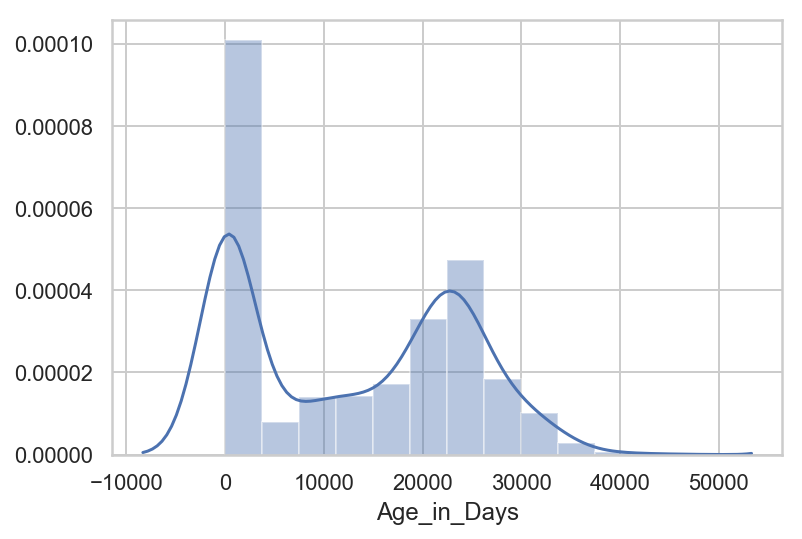

In [156]:
sns.distplot(dead_people.Age_in_Days)

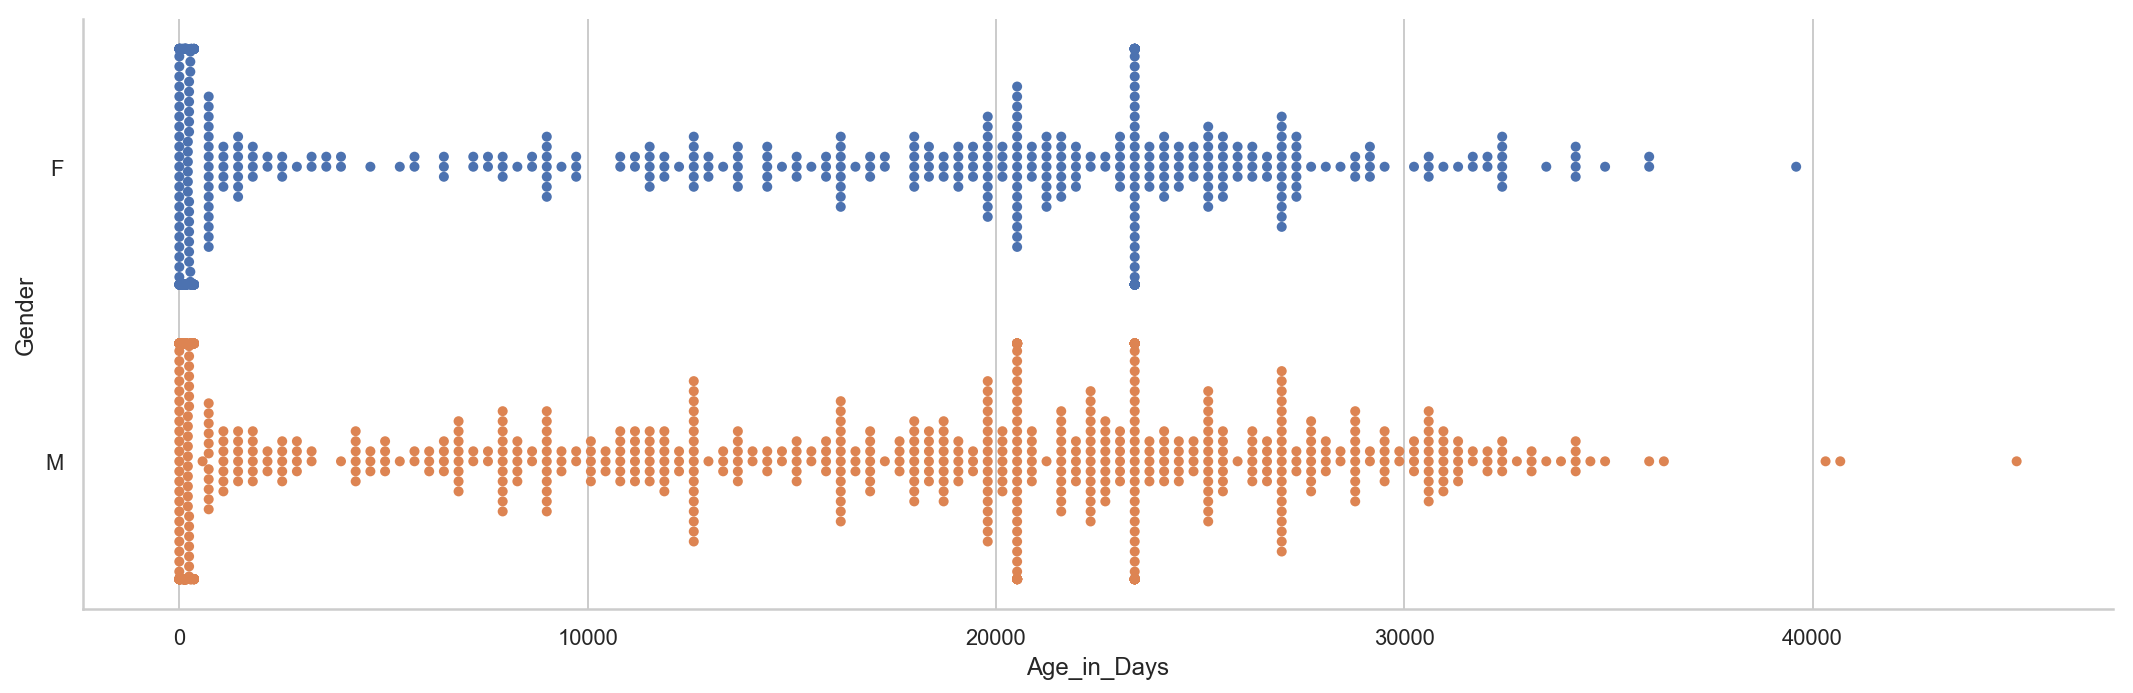

In [157]:
# Gender
sns.catplot(x="Age_in_Days", y="Gender", kind="swarm", data=dead_people, aspect=3);

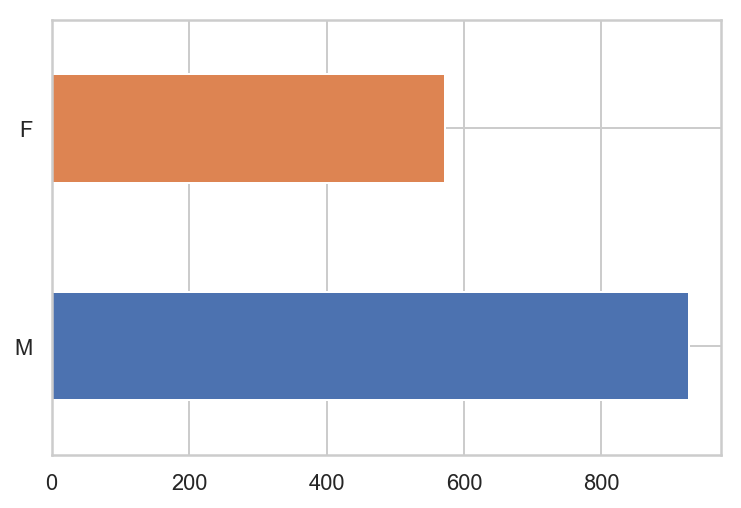

In [158]:
dead_people['Gender'].value_counts()[:].plot(kind='barh')

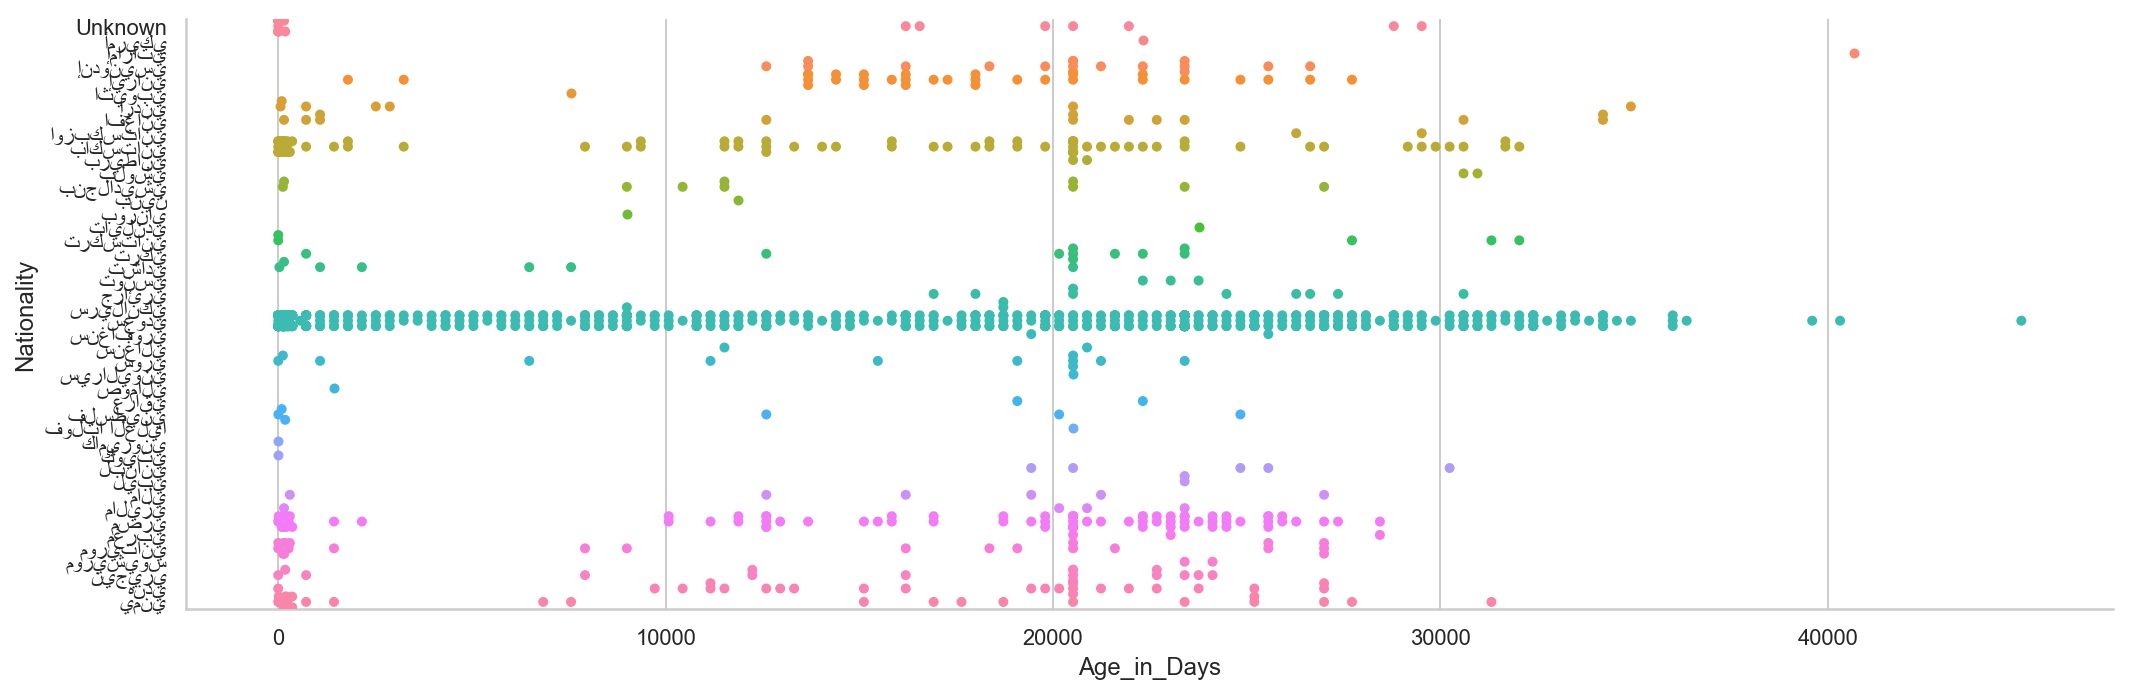

In [159]:
# Nationality
sns.catplot(x="Age_in_Days", y="Nationality", kind="swarm", data=dead_people,aspect=3);

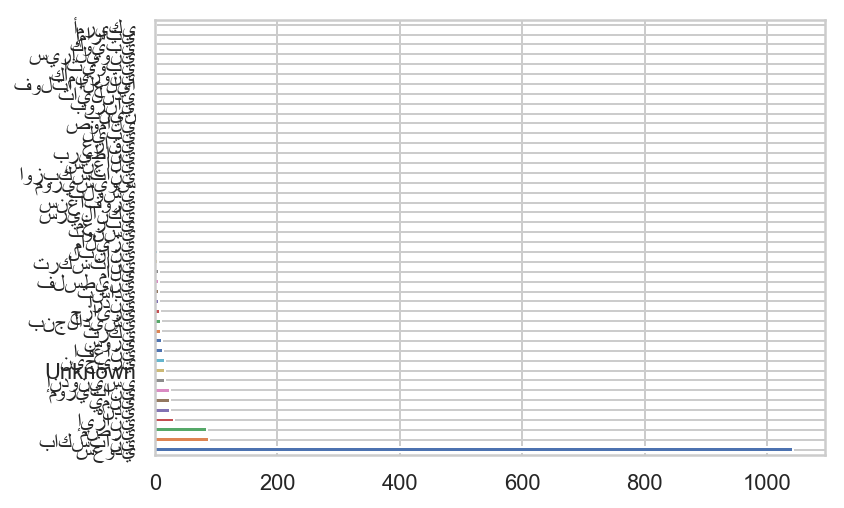

In [160]:
dead_people['Nationality'].value_counts()[:].plot(kind='barh')

In [161]:
l=Counter(dead_people.Nationality)
l

Counter({'Unknown': 17,
         'أمريكي': 1,
         'إماراتي': 1,
         'إندونيسي': 17,
         'إيراني': 31,
         'اثيوبي': 1,
         'اردني': 7,
         'افغاني': 13,
         'اوزبكستاني': 2,
         'باكستاني': 89,
         'بريطاني': 2,
         'بلوشي': 2,
         'بنجلاديشي': 10,
         'بنين': 1,
         'بورناي': 1,
         'تايلندي': 1,
         'تركستاني': 5,
         'تركي': 10,
         'تشادي': 7,
         'تونسي': 3,
         'جزائري': 9,
         'سريلانكي': 3,
         'سعودي': 1042,
         'سنغافوري': 2,
         'سنغالي': 2,
         'سوري': 12,
         'سيراليوني': 1,
         'صومالي': 1,
         'عراقي': 2,
         'فلسطيني': 6,
         'فولتا العليا': 1,
         'كاميروني': 1,
         'كويتي': 1,
         'لبناني': 5,
         'ليبي': 2,
         'مالي': 6,
         'ماليزي': 4,
         'مصري': 85,
         'مغربي': 3,
         'موريتاني': 24,
         'موريشيوس': 2,
         'نيجيري': 16,
         'هندي': 25,
         'يمني': 24})

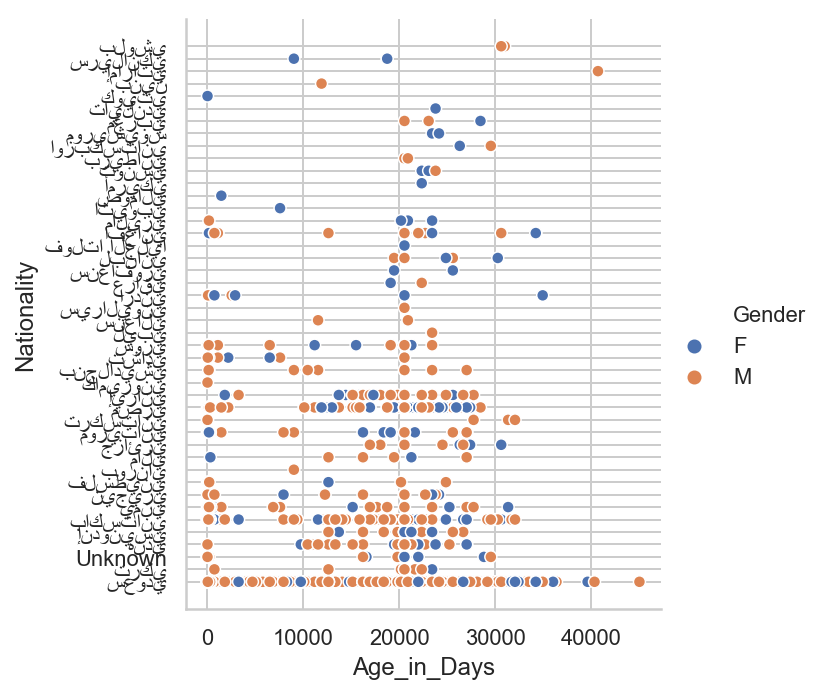

In [162]:
sns.relplot(x="Age_in_Days", y="Nationality", hue="Gender", data=dead_people);

##### checking the (hypothesis)

In [190]:
dead_people_case = dead_people.copy()

In [191]:
# Total people who died
count1 = dead_people_case.Burried_Date.count()
count1

1500

In [192]:
#total people who died in shaban
dead_shaban=[]
for one_date in dead_people_case.Burried_Date:
    if one_date[5:7] == '08':
        dead_shaban.append(one_date)
count2=len(dead_shaban)
count2

34

#### 1500 death cases have happened 
#### 34 death cases were in shaban month
#### is there anough evidence to support this claim for this data set? we will see

In [203]:
dead_people_columns
import math

##### z = phat - p / SqrRoot(p . q/n)

### Modeling

In [204]:
phat = count2 /count1
round(phat,3)

0.023

In [224]:
z = (0.023 - 0.85) / math.sqrt((0.85 * 0.15)/1500)
round(z,4)

-89.7007

The P-Value is < .00001 and it's less than 0.01. 

### Summarize your results

#####     we can say that we have enough evidence to reject that the proportion of muslims tend to die in shaban is more often. and accept the alternative. also even if we had H0: p >= 50 and H1: p < 50. we will reject H0.

### List any resource you used
##### https://pandas.pydata.org/
##### https://github.com/ParallelMazen/SaudiNewsNet
##### https://datasource.kapsarc.org/explore/?disjunctive.theme&disjunctive.country&disjunctive.iso-region&disjunctive.publisher&disjunctive.keyword&sort=modified&refine.country=Saudi+Arabia
##### https://www.reddit.com/r/datasets/comments/3tsg0y/request_data_from_pews_surveys_of_muslims/
##### https://data.worldbank.org/country/saudi-arabia
##### https://www.alriyadh.gov.sa/en/Pages/default.aspx

#### next steps:
#### I would look for data sets which support people's claim and add layers/ prospectives. e.g. other Municipalities in Saudi Arabia

### Thank you